<a href="https://colab.research.google.com/github/bethinaveen23/GEN-AI-2025/blob/main/2303A52093_Week-08_Assignment-8.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to predict the quality of wine using the Keras deep
learning library

2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.

3. (1 ponto) Build the application by loading the saved ANN model.

        Tabela 1: ANN Architecture
        Layer             Neurons    Activation Function
        Hidden Layer - 1   16          sigmoid
        Hidden Layer - 2   24          sigmoid
        Hidden Layer - 3   10          sigmoid

        Tabela 2: Training Parameters
        epochs   batch size   error metric   Optimizer
        260          64         accuracy      rmsprop
Dataset: https://drive.google.com/file/d/1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO/view?
usp=drive_link

• Expected learning Outcomes from this assignment related to python

– Students are able to build ANN model with python deep learning libraries

– Students are able to deploy trained ANN model

– Students are able to measure training and testing performance of trained model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/260
20/20 - 2s - 95ms/step - accuracy: 0.0102 - loss: 2.0384 - val_accuracy: 0.0156 - val_loss: 1.8902
Epoch 2/260
20/20 - 0s - 8ms/step - accuracy: 0.0102 - loss: 1.8048 - val_accuracy: 0.0156 - val_loss: 1.7110
Epoch 3/260
20/20 - 0s - 13ms/step - accuracy: 0.0102 - loss: 1.6488 - val_accuracy: 0.0156 - val_loss: 1.5790
Epoch 4/260
20/20 - 0s - 7ms/step - accuracy: 0.3292 - loss: 1.5307 - val_accuracy: 0.4062 - val_loss: 1.4785
Epoch 5/260
20/20 - 0s - 7ms/step - accuracy: 0.4308 - loss: 1.4402 - val_accuracy: 0.4062 - val_loss: 1.4021
Epoch 6/260
20/20 - 0s - 6ms/step - accuracy: 0.4308 - loss: 1.3735 - val_accuracy: 0.4062 - val_loss: 1.3474
Epoch 7/260
20/20 - 0s - 6ms/step - accuracy: 0.4308 - loss: 1.3249 - val_accuracy: 0.4062 - val_loss: 1.3073
Epoch 8/260
20/20 - 0s - 7ms/step - accuracy: 0.4308 - loss: 1.2901 - val_accuracy: 0.4062 - val_loss: 1.2790
Epoch 9/260
20/20 - 0s - 8ms/step - accuracy: 0.4308 - loss: 1.2651 - val_accuracy: 0.4062 - val_loss: 1.2577
Epoch 10

Training Accuracy: 0.4308
Testing Accuracy: 0.4062
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


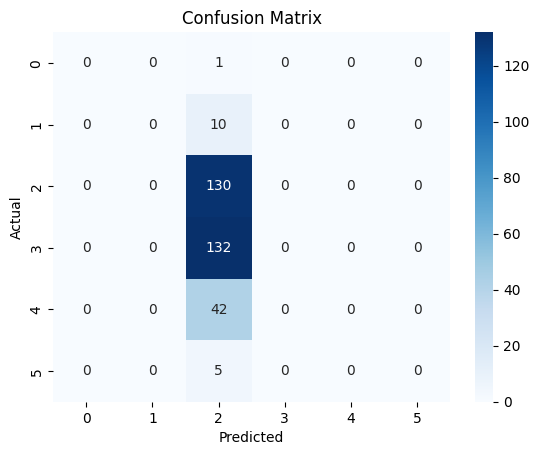

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.41      1.00      0.58       130
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00         5

    accuracy                           0.41       320
   macro avg       0.07      0.17      0.10       320
weighted avg       0.17      0.41      0.23       320

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Wine Quality: 2


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "/content/winequality-red (1).csv"
data = pd.read_csv(url)

# Preprocess data
X = data.drop("quality", axis=1).values  # Features
y = data["quality"].values  # Labels

# Ensure labels start from 0
y -= y.min()

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
x_train, x_test = x_train / np.max(x_train), x_test / np.max(x_test)

# Define the ANN model
def build_model(hidden_layers=[16, 24, 10], activation='sigmoid'):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation, input_shape=(X.shape[1],)))

    for neurons in hidden_layers[1:]:
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer

    model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model
model = build_model()
model.fit(x_train, y_train, epochs=260, batch_size=64, validation_data=(x_test, y_test), verbose=2)

# Save model
model.save("wine_quality_model.h5")

# Load model and evaluate
loaded_model = load_model("wine_quality_model.h5")
train_loss, train_acc = loaded_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)

print(f'Training Accuracy: {train_acc:.4f}')
print(f'Testing Accuracy: {test_acc:.4f}')

# Generate predictions
y_pred = np.argmax(loaded_model.predict(x_test), axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Application to load and use the model
def predict_wine_quality(input_data):
    model = load_model("wine_quality_model.h5")
    input_data = np.array(input_data).reshape(1, -1) / np.max(x_train)
    prediction = np.argmax(model.predict(input_data), axis=1)
    return prediction[0]

# Example usage
example_input = x_test[0]
print(f"Predicted Wine Quality: {predict_wine_quality(example_input)}")
